In [1]:
using Distributed
addprocs(2)

@everywhere include("MyActor3.jl")
@everywhere using .MyActor

In [2]:
@everywhere begin
mutable struct Counter <: Actor
    count::Int
end

@remote add(c::Counter, x::Int) = c.count += x

mutable struct CounterManager <: Actor
    counter::ActorRef
end

@remote add(c::CounterManager, x::Int) = fetch(add(c.counter, x))
end

In [3]:
c = @startat 2 Counter(0)

ActorRef(RemoteChannel{Channel{Any}}(2, 1, 20), 2)

In [4]:
add(c, 1) |> fetch


1

In [5]:
cm = @startat 3 CounterManager(c)

ActorRef(RemoteChannel{Channel{Any}}(3, 1, 26), 3)

In [6]:
add(cm, 2) |> fetch

3

In [14]:
cm = @startat 2 CounterManager(c)

RemoteException: On worker 2:
UndefVarError: MyActor not defined
Stacktrace:
  [1] deserialize_module
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Serialization/src/Serialization.jl:996
  [2] handle_deserialize
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Serialization/src/Serialization.jl:895
  [3] deserialize
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Serialization/src/Serialization.jl:813
  [4] deserialize_datatype
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Serialization/src/Serialization.jl:1363
  [5] handle_deserialize
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Serialization/src/Serialization.jl:866
  [6] deserialize
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Serialization/src/Serialization.jl:813
  [7] handle_deserialize
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Serialization/src/Serialization.jl:873
  [8] deserialize
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Serialization/src/Serialization.jl:813
  [9] #5
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Serialization/src/Serialization.jl:972
 [10] ntupleany
    @ ./ntuple.jl:43
 [11] deserialize_tuple
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Serialization/src/Serialization.jl:972
 [12] handle_deserialize
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Serialization/src/Serialization.jl:856
 [13] deserialize
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Serialization/src/Serialization.jl:813 [inlined]
 [14] deserialize_msg
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Distributed/src/messages.jl:87
 [15] #invokelatest#2
    @ ./essentials.jl:729 [inlined]
 [16] invokelatest
    @ ./essentials.jl:726 [inlined]
 [17] message_handler_loop
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Distributed/src/process_messages.jl:176
 [18] process_tcp_streams
    @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Distributed/src/process_messages.jl:133
 [19] #103
    @ ./task.jl:484

In [13]:
add(cm, 2) |> fetch

MethodError: MethodError: no method matching add(::Future, ::Int64)
Closest candidates are:
  add(!Matched::Counter, ::Int64) at ~/Repos/julia-works/actor-test-jl.ipynb:5
  add(!Matched::CounterManager, ::Int64) at ~/Repos/julia-works/actor-test-jl.ipynb:5
  add(!Matched::ActorRef, ::Int64) at none:0

In [17]:
(@spawnat 3 myid()) |> fetch

3

In [15]:
Distributed.myid() |> fetch

1

In [57]:
function mandelbrot(z::ComplexF64, maxiter::Int)
    c = z
    for n = 1:maxiter
        if abs(z) > 2.0
            return n-1
        end
        z = z^2 + c
    end
    return maxiter
end

function run(z0::ComplexF64, z1::ComplexF64, div::Int) 
    x = range(real(z0), real(z1), length=div)
    y = range(imag(z0), imag(z1), length=div)
    m = zeros(Int, div, div)
    for i = 1:div
        for j = 1:div
            m[i,j] = mandelbrot(x[i] + y[j]*im, 80)
        end
    end
    return m
end

function run2(z0::ComplexF64, zstep::ComplexF64, zsize::Tuple{Int, Int})
    x = range(real(z0), real(z0) + real(zstep) * zsize[1], length=zsize[1])
    y = range(imag(z0), imag(z0) + imag(zstep) * zsize[2], length=zsize[2])
    m = zeros(Int, zsize[1], zsize[2])
    for i = 1:zsize[1]
        for j = 1:zsize[2]
            m[i,j] = mandelbrot(x[i] + y[j]*im, 80)
        end
    end
    return m
end

#res = run(ComplexF64(-1, -1), ComplexF64(1, 1), 2000)
res = run2(ComplexF64(-1, -1), ComplexF64(0.001, 0.001), (2000,2000))


2000×2000 Matrix{Int64}:
 2  2  2  2  2  2  2  2  2  2  2  2  2  …  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  …  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 ⋮              ⋮              ⋮        ⋱        ⋮              ⋮           
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

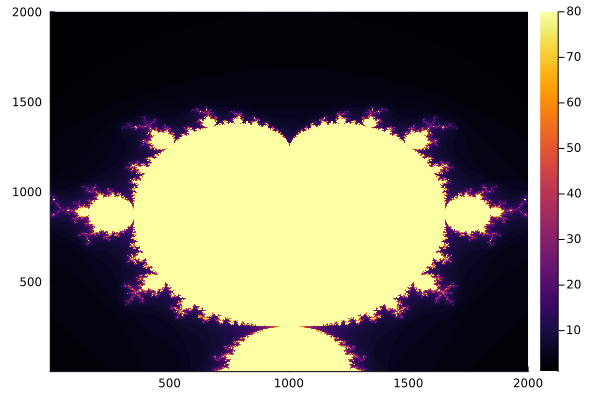

In [58]:
using Plots
plot(res, st = :heatmap)

In [67]:
mutable struct Worker <: Actor
    master::ActorRef
    accumulator::ActorRef
end

function run(w::Worker)
    while true
        z0, zstep, zsize, i0 = fetch(getWork(w.master))
        if z0 == nothing
            break
        end
        m = run(z0, zstep, zsize)
        accumulator(w.accumulator, i0, i1, m)
    end
end

mutable struct Accumulator <: Actor
    m::Array{Int, 2}
    Accumulator(zsize::Tuple{I}
end

function accumulator(a::Accumulator, i0::Tuple{Int, Int}, i1::Tuple{Int, Int}, m::Array{Int, 2})
    a.m[i0[1]:i1[1],i0[2]:i1[2]] = m
end

mutable struct Master <: Actor
    z0::ComplexF64
    zstep::ComplexF64
    zsize::Tuple{Int, Int}
    div::Int
    current::Int
    Master(z0::ComplexF64, z1::ComplexF64, zsize::Tuple{Int, Int}, div::Int) = new(z0, real(z1-z0)/zsize[1] + (imag(z1-z0)/zsize[0])im, zsize, div, 0)
end

function getWork(m::Master)
    if m.current >= m.div
        return nothing, nothing, nothing, nothing
    end
    zstart = z0 + (current / div) * real(zstep)
    zsize = {zsize[1] / div, zsize[2]}
    i0 = {(current / div) * zsize[1], 0}
    return zstart, zstep, zsize, i0
end



In [46]:
a (1,2))

(1, 2)

In [68]:
3/8

0.375

In [61]:
t = zeros(Int, 10, 10)
t[5:6,5:6] = ones(Int, 2, 2)
t


10×10 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  1  0  0  0  0
 0  0  0  0  1  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0

In [66]:
(10 + 10im) // (2, 3)

MethodError: MethodError: no method matching //(::Complex{Int64}, ::Tuple{Int64, Int64})
Closest candidates are:
  //(::Complex, !Matched::Real) at rational.jl:78
  //(::Number, !Matched::Complex) at rational.jl:79

In [78]:
@everywhere begin
function callbackCounter(ar::ActorRef, n::Int)
    for i = 1:n
        add(ar, 1)
    end
end
end
c = @startat 1 Counter(0)


ActorRef(RemoteChannel{Channel{Any}}(1, 1, 64), 1)

In [86]:
@spawnat 2 callbackCounter(c, 10)


Future(2, 1, 90, ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (2372789, 2372789, 4588653965063154620)), nothing)

In [80]:
add(c, 10) |> fetch

20

In [82]:
callbackCounter(c, 10)

In [87]:
add(c, 0) |> fetch


60

In [ ]:
generate_actor_wrapper

In [7]:
! (1 isa Int)


false

In [11]:
a = []
"$(typeof(a))"

"Vector{Any}"

In [16]:
parse(Int, "1")

1